## Equity charting using Yahoo Finance

In [1]:
#pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf

In [3]:
#select stocks to plot
stocks = ['TSLA','BA','NVDA','MSFT','SPY']

In [4]:
data = yf.download(stocks, start='2020-01-01', end='2020-12-31')
#parameters for yf.download are stock list, start of period, end of period

#our DataFrame includes Open, Close, Adjusted Close, High, Low, and Volume data, we only want Adj. Close
df = data.loc[:, 'Adj Close'].copy() #create a df using only adjusted close price data

[*********************100%***********************]  5 of 5 completed


### Plot of price data

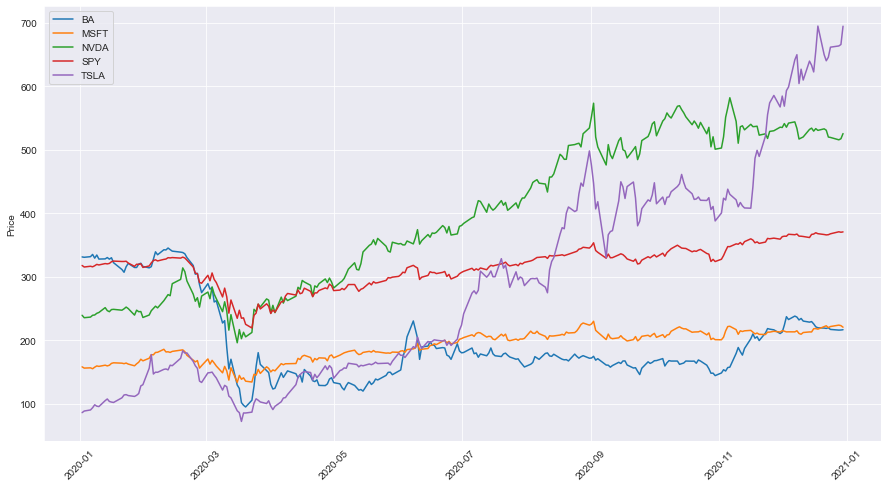

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=(15,8))

ax = sns.lineplot(data=df, dashes=False)
ax.set(ylabel='Price')
ax.set(xlabel=None)
plt.xticks(rotation=45)

plt.show()

### Normalize Returns
- Useful for comparing relative performance across stocks
- Can be interpreted as growth of $100

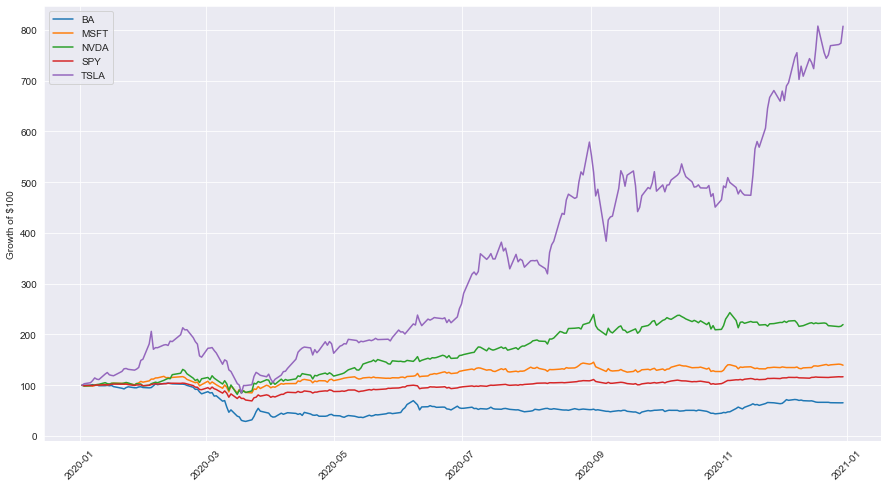

In [6]:
norm = df.div(df.iloc[0]).mul(100)

plt.figure(figsize=(15,8))

ax = sns.lineplot(data=norm, dashes=False)
ax.set(ylabel='Growth of $100')
ax.set(xlabel=None)
plt.xticks(rotation=45)

plt.show()

## Indices

In [7]:
#select indices to plot
indices = ['^DJI','^IXIC','^RUT','^FTSE']
index = yf.download(indices, start='1995-01-01', end='2020-12-31')

dfix = index.loc[:, 'Adj Close'].copy() #create a df using only adjusted close price data
dfix.fillna(method='ffill', inplace=True) #forward fill nans
dfix.dropna(inplace=True)
dfix.rename(columns={'^DJI':'Dow Jones','^IXIC':'NASDAQ',
                     '^RUT':'Russel 2000','^FTSE':'FTSE 100'}, inplace=True) #rename columns
#print(dfix.isna().sum())

[*********************100%***********************]  4 of 4 completed


Normalizing is necessary given the wide scale of index price levels:

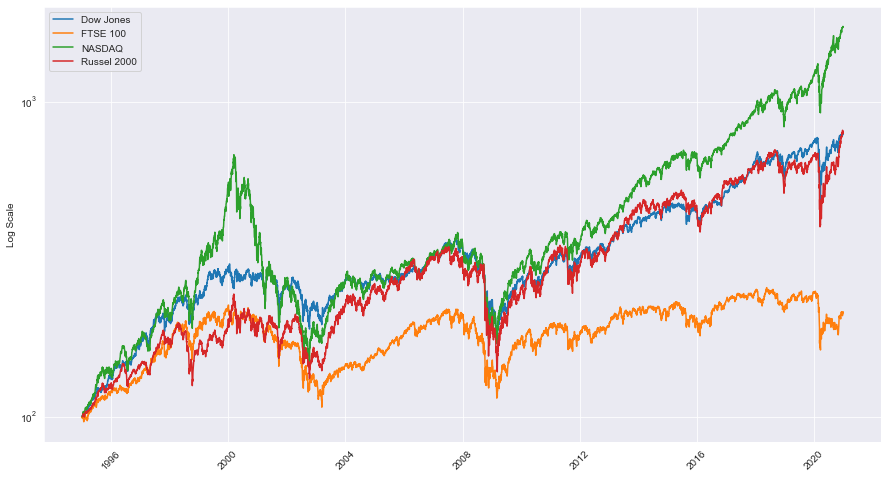

In [8]:
normix = dfix.div(dfix.iloc[0]).mul(100)

plt.figure(figsize=(15,8))

ax = sns.lineplot(data=normix, dashes=False)
ax.set(ylabel='Log Scale', yscale='log')
ax.set(xlabel=None)
plt.xticks(rotation=45)

plt.show()

This graph is a bit too noisy, especially if we want to include additional indices. We can reduce noise simply by plotting prices yearly instead of daily:

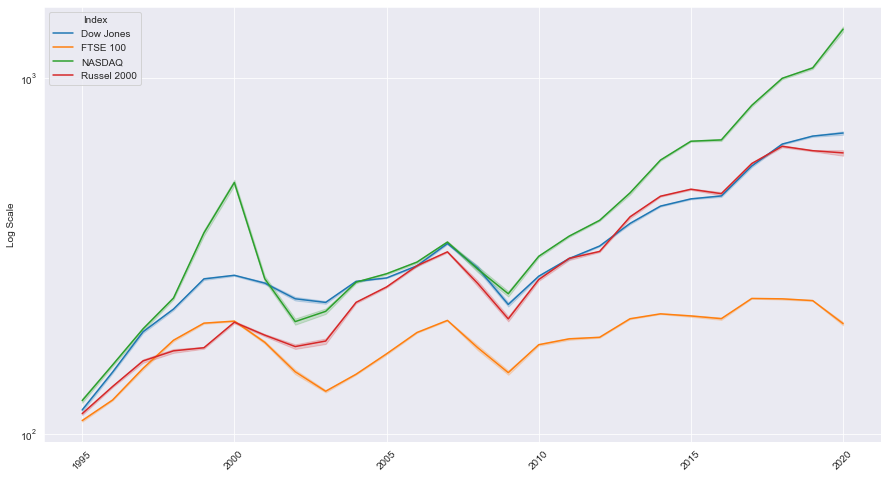

In [9]:
less_noise = normix.reset_index()
less_noise['year'] = pd.DatetimeIndex(less_noise['Date']).year
less_noise.drop(columns='Date', inplace=True)
less_noise = less_noise.melt('year',var_name='Index',value_name='Price')

plt.figure(figsize=(15,8))

ax = sns.lineplot(data=less_noise,x='year',y='Price',hue='Index')
ax.set(ylabel='Log Scale', yscale='log')
ax.set(xlabel=None)
plt.xticks(rotation=45)

plt.show()

Or, if we feel like now we've lost too much detail, we can move to monthly.

In [10]:
less_noise_mo = normix.reset_index()
less_noise_mo['month'] = pd.DatetimeIndex(less_noise_mo['Date']).month
less_noise_mo['year'] = pd.DatetimeIndex(less_noise_mo['Date']).year
less_noise_mo['year_mo'] = np.where(less_noise_mo['month']<10, 
                                    less_noise_mo['year'].astype(str) + '-0' + less_noise_mo['month'].astype(str), 
                                    less_noise_mo['year'].astype(str) + '-' + less_noise_mo['month'].astype(str))
less_noise_mo.drop(columns=['Date','month','year'], inplace=True)
less_noise_mo = less_noise_mo.melt('year_mo',var_name='Index',value_name='Price')

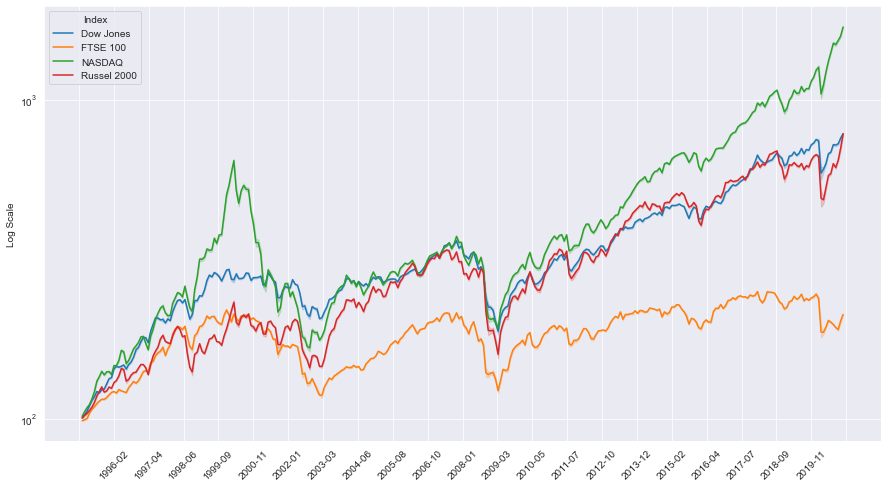

In [11]:
import matplotlib.ticker as ticker

plt.figure(figsize=(15,8))

ax = sns.lineplot(data=less_noise_mo,x='year_mo',y='Price',hue='Index')
ax.set(ylabel='Log Scale', yscale='log')
ax.set(xlabel=None)

ax.xaxis.set_major_locator(ticker.LinearLocator(25))

plt.xticks(rotation=45)

plt.show()

# These charts can be used interchangably with any stocks, indices, cryptocurrencies, etc. available on Yahoo Finance

In [12]:
cryptos = ['BTC-USD','ETH-USD','DOGE-USD']
crypto = yf.download(cryptos, start='2021-01-01', end='2021-12-31')
#parameters for yf.download are stock list, start of period, end of period

#our DataFrame includes Open, Close, Adjusted Close, High, Low, and Volume data, we only want Adj. Close
crypto_df = crypto.loc[:, 'Adj Close'].copy() #create a df using only adjusted close price data

[*********************100%***********************]  3 of 3 completed


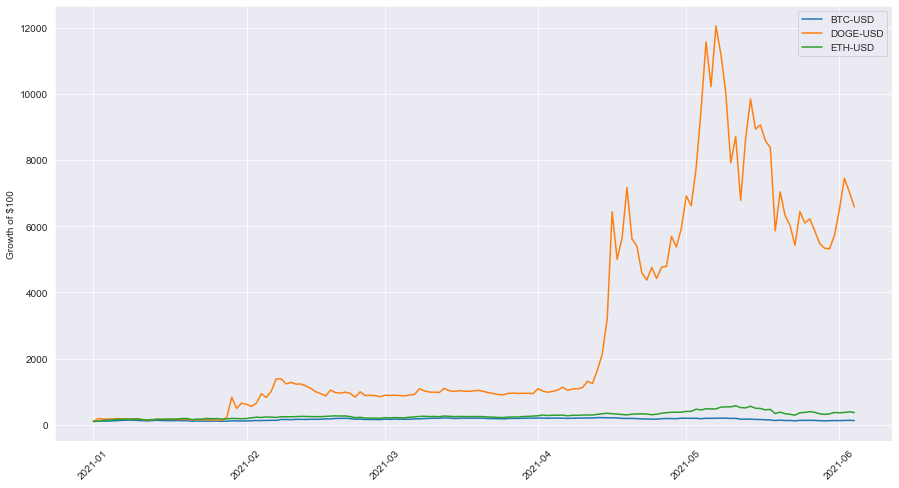

In [13]:
crypto_norm = crypto_df.div(crypto_df.iloc[0]).mul(100)

plt.figure(figsize=(15,8))

ax = sns.lineplot(data=crypto_norm, dashes=False)
ax.set(ylabel='Growth of $100')
ax.set(xlabel=None)
plt.xticks(rotation=45)

plt.show()